## Homework 4 Assignment 1 
Prepared by eb3237

Instructions: 

GENERATE 100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), all with the same population mean. Include a Normal, a Poisson, a Binomial, a Chi-Squared distribution, and 1 more of your choice.

For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well).

Describe the behavior you see in the plots in terms of the law of large numbers.

PLOT the distributions of all sample means (together for all distributions). 

Mandatory: as a histogram. Optional: in any other way you think is convincing 

Extra Credit: FIT a gaussian to the distribution of means

In [1]:
from __future__ import print_function

import pylab as pl
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
import numpy as np
import matplotlib as plt
import pandas as pd
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
# choosing which distributions to use
distributions = ['chisq', 'norm', 'binom', 'pois','laplace']

In [3]:
# setting parameters for below distributions
np.random.seed(99)

mymean = 100
mystd = 50

p = 0.5
loc = mymean
tr = 200
scale = 2
lam = mymean
#sd = mySTD
#n = mean / p

In [4]:
# creating 100 sample distributions, we need all integers between 10 and 2000

mysize = (np.random.rand(100) * 2000).astype(int)
print (mysize, mysize.shape)

[1344  976 1650   62 1616 1131  595   93 1981   13 1539 1493  754  988 1857
  790 1947 1048  187 1626  423 1108  584 1632 1656  443 1289  190  823  193
  288  424  953  155  470   13 1797 1104  335 1857 1084   83 1049 1280 1601
 1669  505 1936  932  528 1098  754  407 1830 1878 1674  865 1432 1702  158
  819 1283 1952 1410 1273  410  586  320  607 1437 1915   31  625   97 1749
 1387 1653 1836  306  940 1092 1032 1440 1645  470  211 1227  487 1653  931
 1382  709  206  597  326  465 1088  709 1489 1296] (100,)


In [5]:
# making a dictionary to host the distributions, because we need to create 5 different distributions
# md is an empty disctionary
# the outside dictionary hosts the distributions as dictionary, 
# and further on each distribution dictionary will contain 100 distribution (arrays of diferent sizes)

md = {}

for d in distributions:
    md[d] = {}
# md now is a dictionary with one object: an array by the certain key 

In [6]:
#creating sample distributions 
for n in mysize:
    md['chisq'][n] = np.random.chisquare(mymean, size=n)
    md['norm'][n] = np.random.normal(mymean, mystd, size=n)
    md['binom'][n] = np.random.binomial(tr, p, size=n)
    md['pois'][n] = np.random.poisson(lam, size=n)
    md['laplace'][n] = np.random.laplace(loc, scale, size=n)

In [7]:
#converting the dictionary into a dataframe.
# each element in the dataframe is a sample. 
dist_means = pd.DataFrame(md)


#In order to 
#replacing each sample with its mean to create a df with sample means
for c in dist_means.columns:
    
    for n in mysize:
        dist_means[c][n] = np.mean(dist_means[c][n])

In [8]:
dist_means.head()

,binom,chisq,laplace,norm,pois
13,97.1538,98.6887,100.113,92.2499,96.5385
31,98.8065,104.067,99.6013,97.2419,100.516
62,99.4355,100.076,99.7835,93.607,101.758
83,99.3494,101.011,99.9026,97.8603,100.542
93,99.5161,100.06,100.197,103.108,100.011


In [9]:
#characteristics of the dataframe
dist_means.describe()

,binom,chisq,laplace,norm,pois
count,94.000000,94.000000,94.000000,94.000000,94.000000
unique,94.000000,94.000000,94.000000,94.000000,94.000000
top,99.872398,98.795907,99.952022,98.756908,99.944877
freq,1.000000,1.000000,1.000000,1.000000,1.000000


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


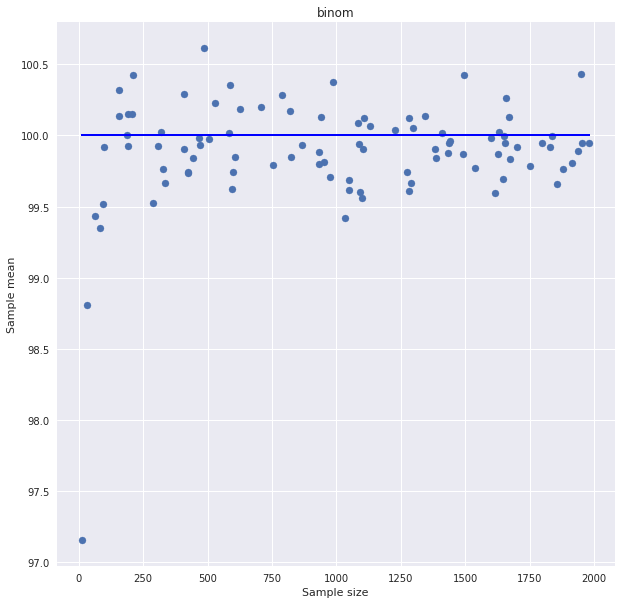

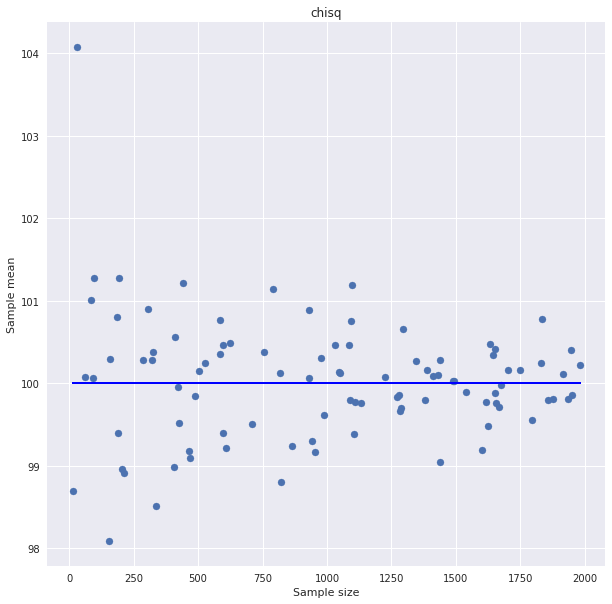

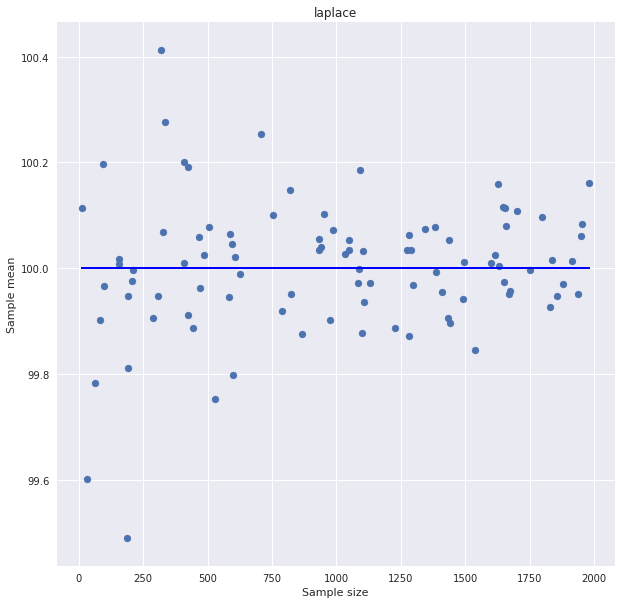

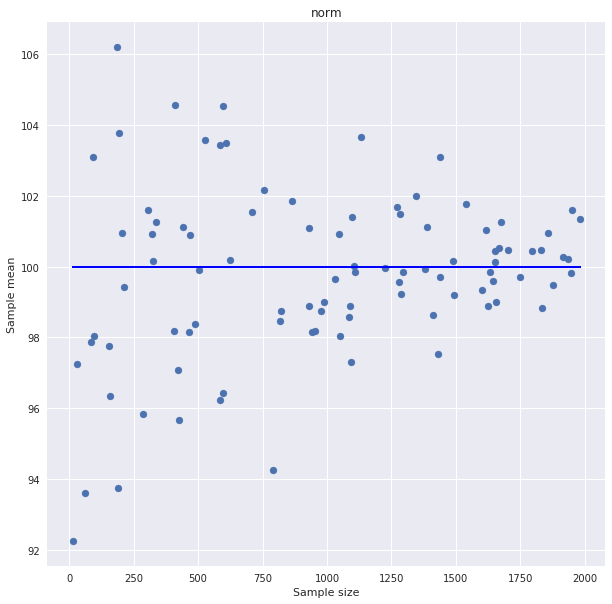

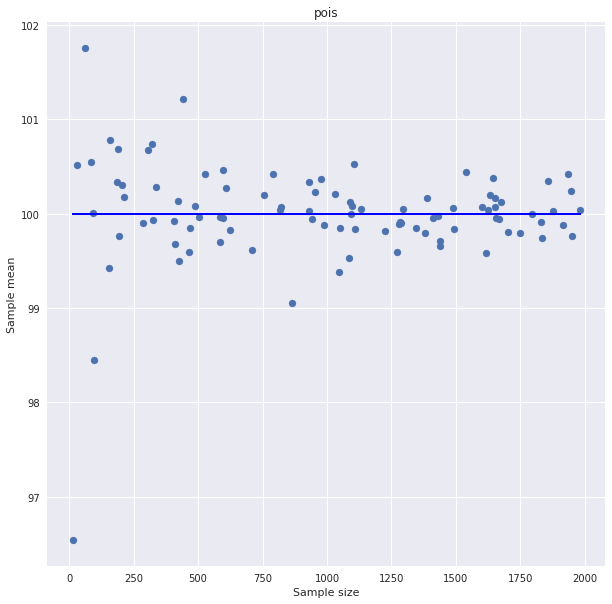

In [10]:
#plotting sample means vs sample size for all distributions a scatterplots
for c in dist_means.columns:
    
    fig, ax = pl.subplots(1,1,figsize=(10,10))
    ax = pl.scatter(dist_means.index, dist_means[c])
    ax = pl.plot(mysize, [100 for i in mysize], color = 'blue')
    pl.xlabel('Sample size')
    pl.ylabel('Sample mean')
    pl.title(c)

Figure 1: The above distribution pattern describes the Central Limit Theorem, which states that the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger — no matter what the shape of the population distribution (https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/normal-distributions/central-limit-theorem-definition-examples/)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


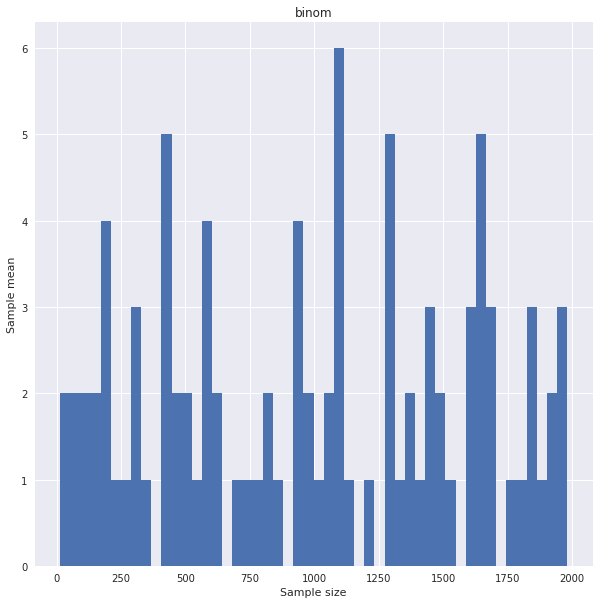

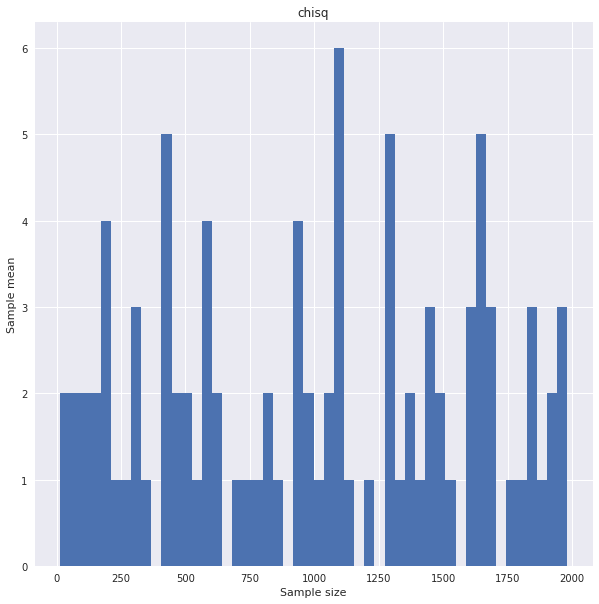

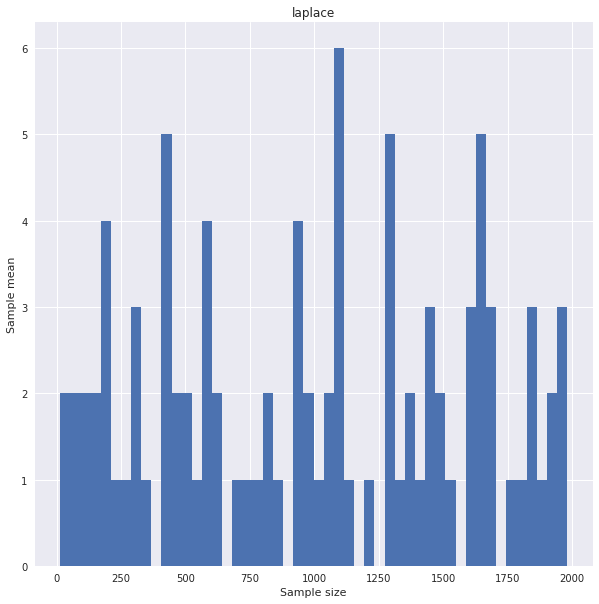

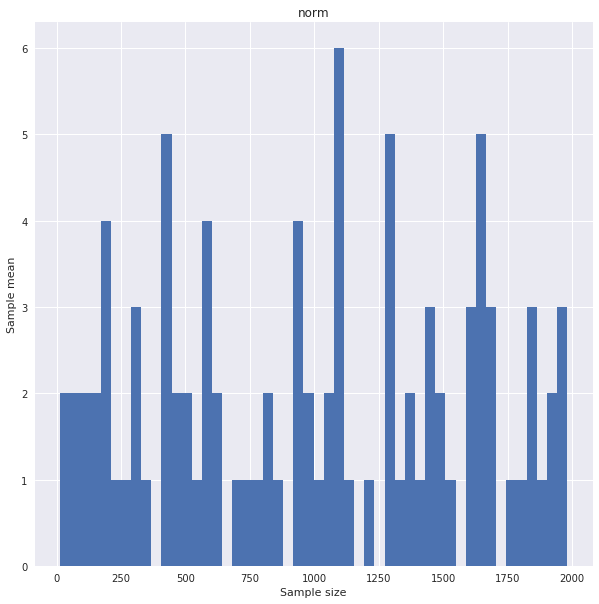

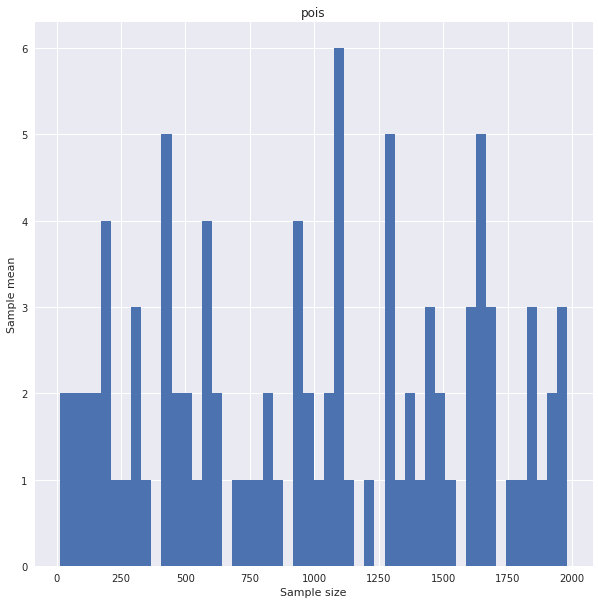

In [11]:
for c in dist_means.columns:
    
    fig, ax = pl.subplots(1,1,figsize=(10,10))
    ax = pl.hist(dist_means.index, bins = 50)

    pl.xlabel('Sample size')
    pl.ylabel('Sample mean')
    pl.title(c)

Figure 2: Histograms of five distributions

In [12]:
#obtaining the mean of means
dist_means['all_means'] = dist_means.apply(lambda x: np.mean(x), axis = 1)

In [13]:
#looking at data
dist_means.head()

,binom,chisq,laplace,norm,pois,all_means
13,97.1538,98.6887,100.113,92.2499,96.5385,96.948835
31,98.8065,104.067,99.6013,97.2419,100.516,100.046563
62,99.4355,100.076,99.7835,93.607,101.758,98.932072
83,99.3494,101.011,99.9026,97.8603,100.542,99.733119
93,99.5161,100.06,100.197,103.108,100.011,100.578557


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


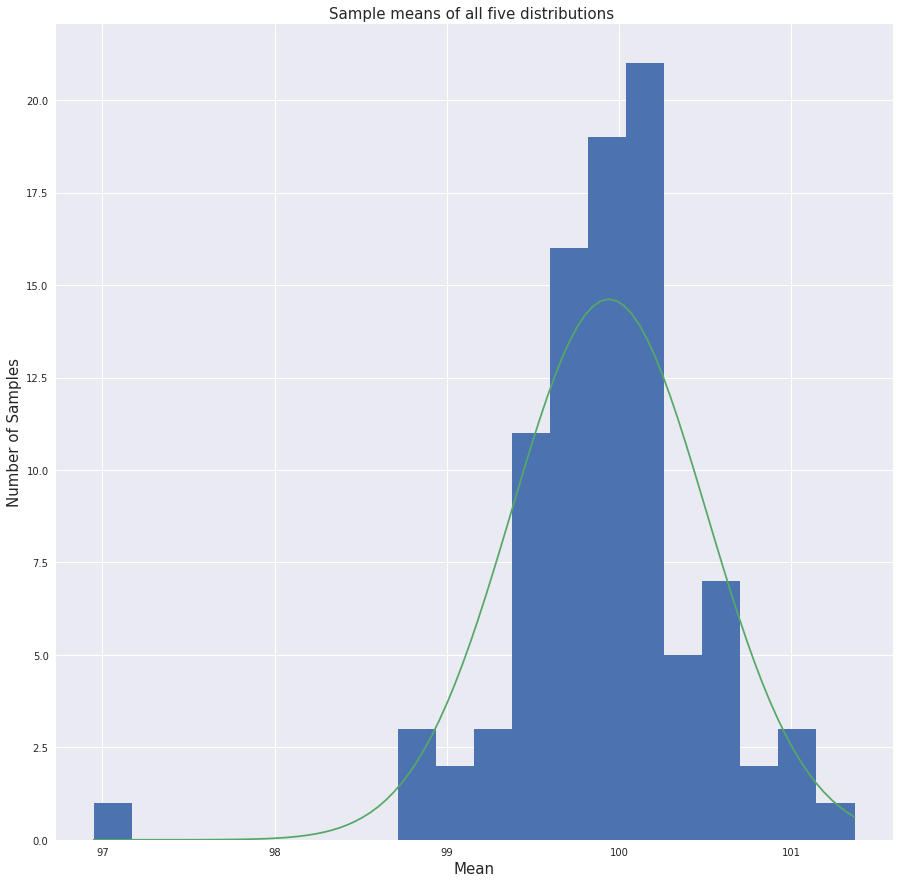

In [14]:
#plotting gaussian in sample means of all five distributions 
import matplotlib.mlab as mlab
fig, ax = pl.subplots(1,1,figsize=(15,15))

ax = pl.hist(dist_means.all_means, bins = 20)
pl.xlabel('Mean', fontsize = 15)
pl.ylabel('Number of Samples', fontsize = 15)
pl.title('Sample means of all five distributions ', fontsize = 15)

mu = np.mean(dist_means.all_means)
variance = np.var(dist_means.all_means)
sigma = np.sqrt(variance)
x = np.linspace(min(dist_means.all_means), max(dist_means.all_means), 100)
dx = ax[1][1]-ax[1][0]
scale = len(dist_means.all_means)*dx
gauss = pl.plot(x, mlab.normpdf(x, mu, sigma)*scale)



Figure 3: Histogram of sample means of all five distributions. According to the Central Limit Theorem, properly normalized sum tends toward a normal distribution (informally a "bell curve") even if the original variables themselves are not normally distributed. 